In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import scipy.interpolate
import scipy.fftpack
from skimage.transform import rotate
from skimage.data import shepp_logan_phantom

image = shepp_logan_phantom()
image.shape



(400, 400)

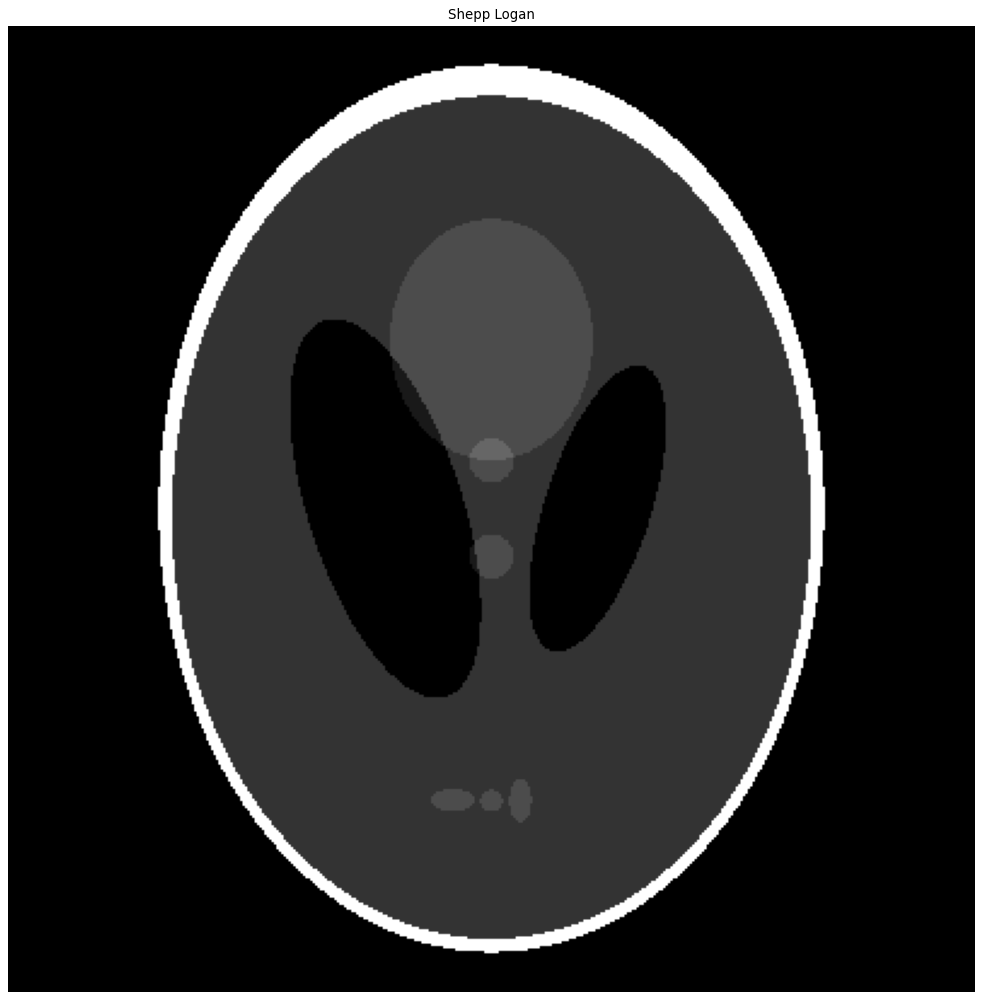

In [2]:
S=400 
N=1000

plt.figure(figsize=(16, 16), dpi=80)
plt.title("Shepp Logan")
plt.imshow(image)
plt.gray()
plt.axis("off")
plt.savefig("SheppLogan.png")


In [3]:
def Sinogram(image, theta):
    #sinogram = radon(image, theta, circle=False)
    sinogram = np.zeros((len(theta), max(image.shape)))
    for i in range(0, len(theta)):
        rotated_image = rotate(image, theta[i], resize=False)
        sinogram[i] = sum(rotated_image)
    return sinogram

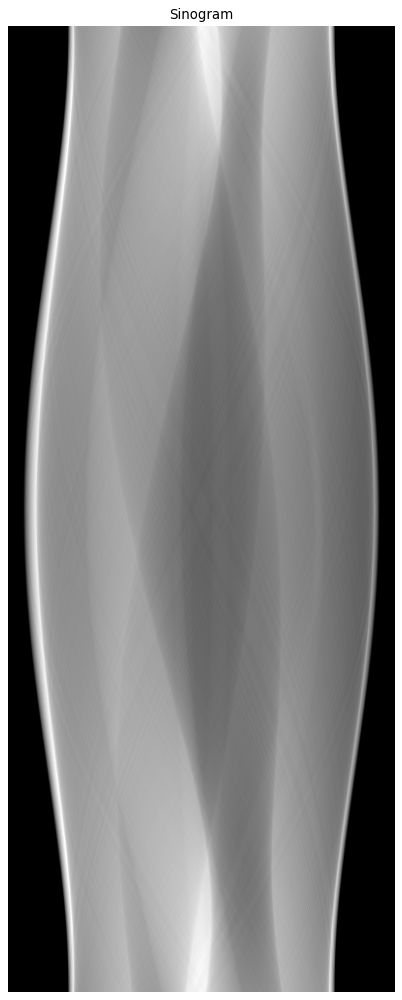

In [4]:
angles_deg = np.linspace(0,180,N,endpoint=False)
sinogram = Sinogram(image, angles_deg)
plt.figure(figsize=(16, 16), dpi=80)
plt.title("Sinogram")
plt.imshow(sinogram)
plt.gray()
plt.axis("off")
plt.savefig("sinogram.png")

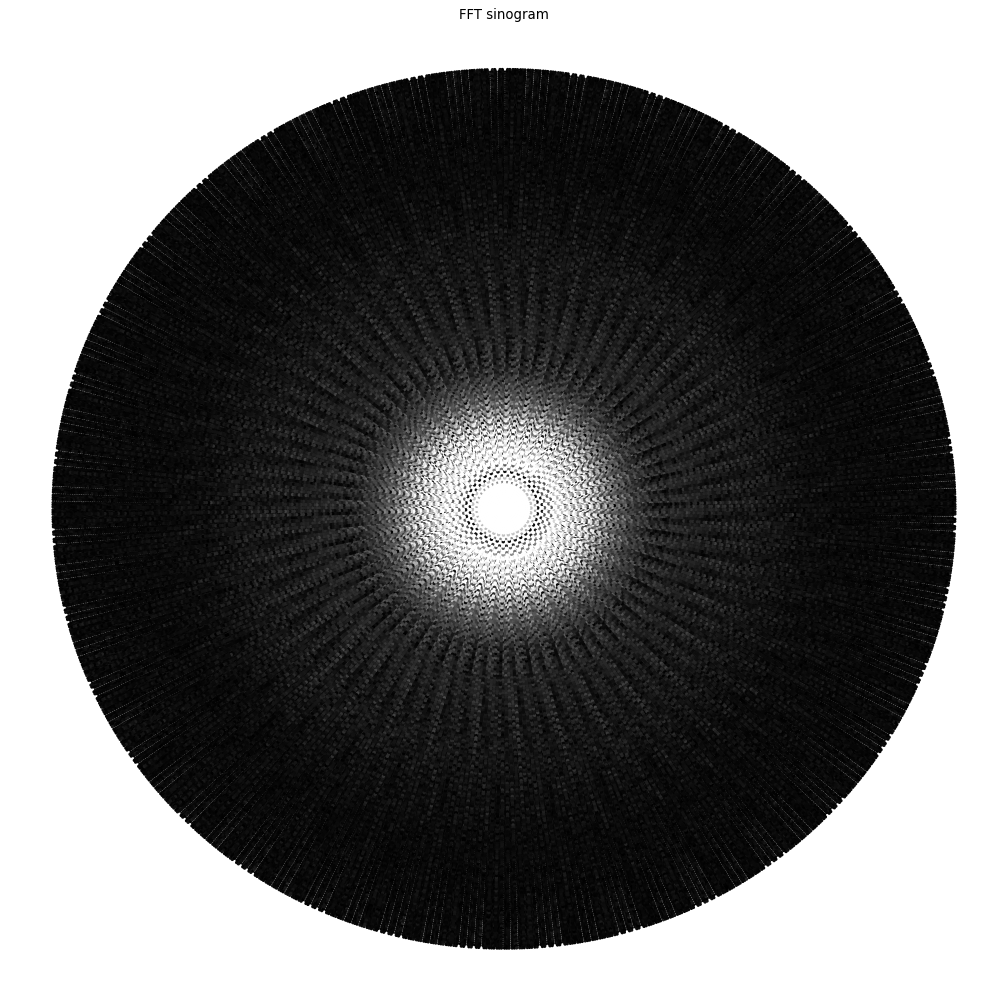

In [35]:
plt.figure(figsize=(16, 16), dpi=80)
plt.title("FFT sinogram")
plt.gray()
plt.axis("off")
for i,a in enumerate(angles_deg):
    FT = np.fft.fftshift(np.fft.fft((sinogram[i,:])))
    r=np.arange(S)-S/2+1
    x, y = (S/2)+r*np.cos(a), (S/2)+r*np.sin(a)

    plt.scatter(
        x,
        y,
        c=np.absolute(FT),
        marker='.',
        edgecolor='none',
        vmin=0,
        vmax=255
    )
    

plt.show()